In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 63.9MB/s]


100%|██████████| 170M/170M [00:04<00:00, 35.0MB/s]


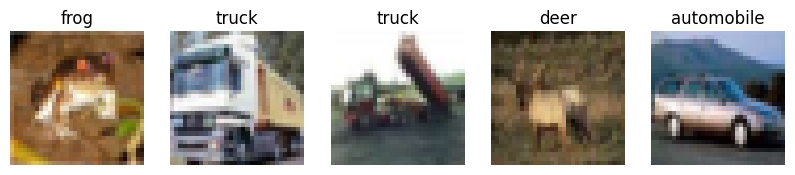

In [3]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='/data', train = True, download=True, transform=transform)
classes = trainset.classes

#This code is for showing 5 sample images
fig, axes = plt.subplots(1,5,figsize=(10,3))
for i in range(5):
    image, label = trainset[i]
    axes[i].imshow(np.transpose(image.numpy(),(1,2,0)))
    axes[i].set_title(classes[label])
    axes[i].axis('off')
plt.show()

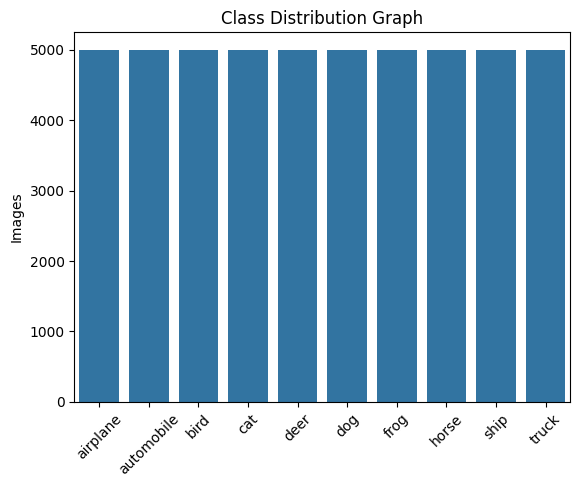

In [4]:
from collections import Counter
import seaborn as sns

labels = [trainset[i][1] for i in range(len(trainset))]
label_counts = Counter(labels)
class_names = trainset.classes
class_counts = [label_counts[i] for i in range(10)]

sns.barplot(x=class_names, y=class_counts)
plt.title("Class Distribution Graph")
plt.xticks(rotation=45)
plt.ylabel("Images")
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

print(model)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Epoch 1/10 - Loss: 0.8220 - Accuracy: 71.01%
Epoch 2/10 - Loss: 0.7000 - Accuracy: 75.43%
Epoch 3/10 - Loss: 0.5940 - Accuracy: 79.22%
Epoch 4/10 - Loss: 0.5082 - Accuracy: 82.13%
Epoch 5/10 - Loss: 0.4220 - Accuracy: 85.16%
Epoch 6/10 - Loss: 0.3424 - Accuracy: 87.92%
Epoch 7/10 - Loss: 0.2716 - Accuracy: 90.49%
Epoch 8/10 - Loss: 0.2177 - Accuracy: 92.38%
Epoch 9/10 - Loss: 0.1663 - Accuracy: 94.22%
Epoch 10/10 - Loss: 0.1356 - Accuracy: 95.26%
Training complete!


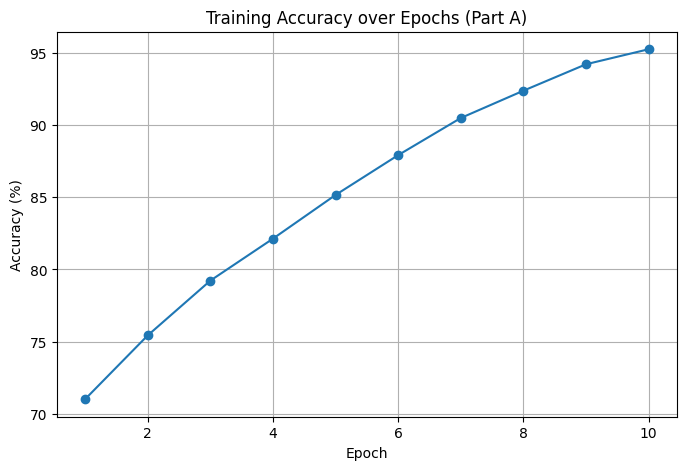

In [9]:
train_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    train_accuracies.append(epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.2f}%")

print("Training complete!")

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o')
plt.title('Training Accuracy over Epochs (Part A)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


In [14]:
model.eval()

correct = 0
total = 0
all_preds = []
all_label = []

with torch.no_grad():
    for images, labels in testloader:
        images, label = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_label.extend(labels.cpu().numpy())

test_accuracy = 100*correct/total
print(f" Test Accuracy: {test_accuracy: .2f}%")

 Test Accuracy:  70.86%


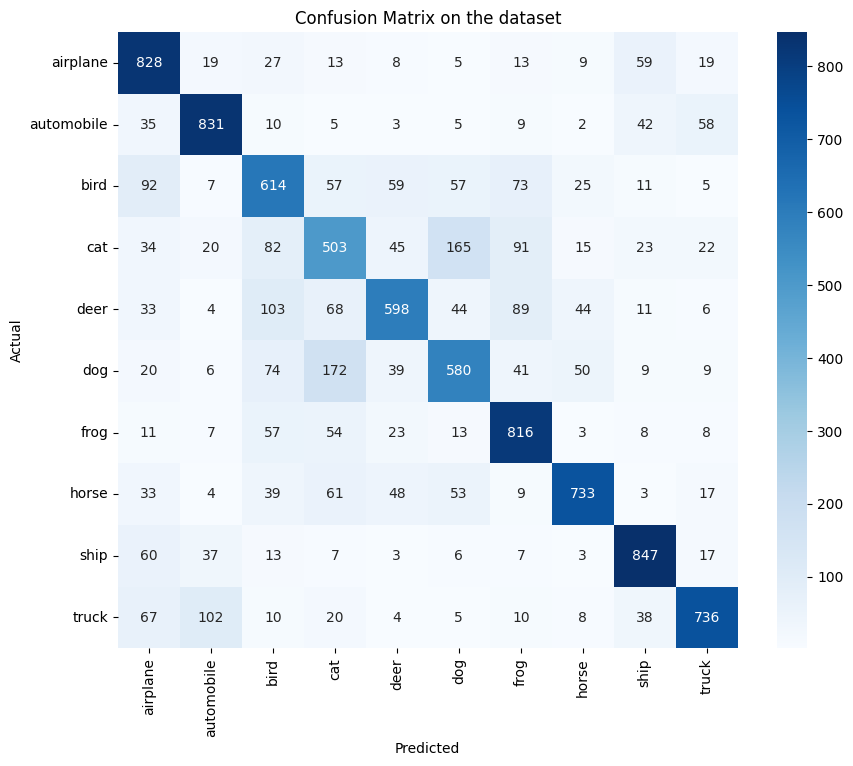

Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.83      0.75      1000
  automobile       0.80      0.83      0.82      1000
        bird       0.60      0.61      0.61      1000
         cat       0.52      0.50      0.51      1000
        deer       0.72      0.60      0.65      1000
         dog       0.62      0.58      0.60      1000
        frog       0.70      0.82      0.76      1000
       horse       0.82      0.73      0.77      1000
        ship       0.81      0.85      0.83      1000
       truck       0.82      0.74      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_label, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=trainset.classes,
            yticklabels=trainset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on the dataset')
plt.show()

print("Classification Report:")
print(classification_report(all_label, all_preds, target_names=trainset.classes))

In [15]:
misclassified=[]

model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images,labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(len(labels)):
            if predicted[i]!=labels[i]:
                misclassified.append((images[i].cpu(),predicted[i].cpu(),labels[i].cpu()))

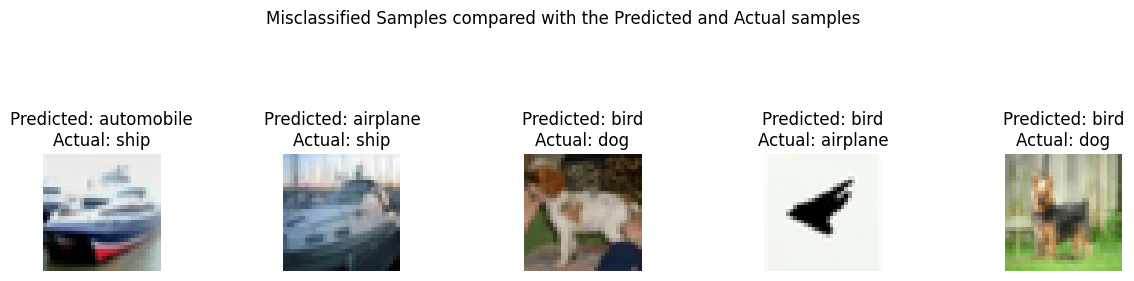

In [16]:
fig, axes = plt.subplots(1,5, figsize=(15,3))
for i in range(5):
    image,pred,actual = misclassified[i]
    image = image.permute(1,2,0)*0.5+0.5
    axes[i].imshow(image.numpy())
    axes[i].set_title(f"Predicted: {trainset.classes[pred]}\nActual: {trainset.classes[actual]}")
    axes[i].axis('off')

plt.subplots_adjust(top=0.50)
plt.suptitle("Misclassified Samples compared with the Predicted and Actual samples")
plt.show()

In [17]:
import torch.nn.functional as F

softmax_confidences = []
predicted_labels=[]
true_labels = []
images_list = []

model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        confidence, predicted = torch.max(probs,1)

    for i in range(len(labels)):
        softmax_confidences.append(confidence[i].item())
        predicted_labels.append(predicted[i].cpu().item())
        true_labels.append(labels[i].cpu().item())
        images_list.append(images[i].cpu())

In [18]:
import numpy as np

confidences_np = np.array(softmax_confidences)
indices = np.argsort(confidences_np)

lowest_indices = indices[:5]

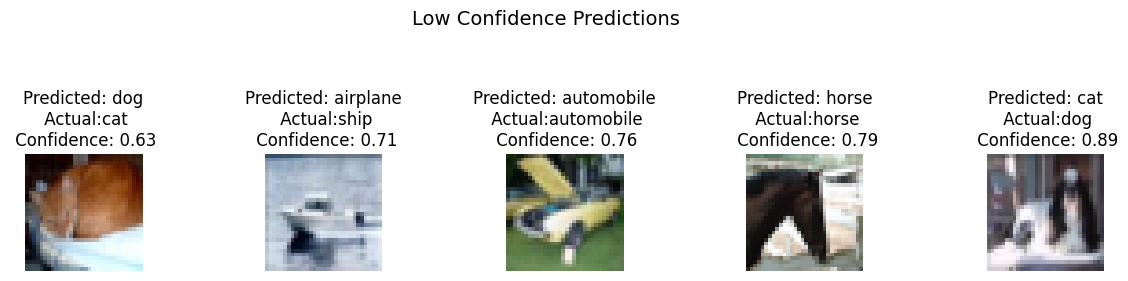

In [20]:
fig, axes = plt.subplots(1,5, figsize=(15,3))

for i, indx in enumerate(lowest_indices):
    image = images_list[indx]
    pred = predicted_labels[indx]
    actual = true_labels[indx]
    confidence = softmax_confidences[indx]

    image = image.permute(1,2,0)*0.5+0.5
    axes[i].imshow(image.numpy())
    axes[i].set_title(f"Predicted: {trainset.classes[pred]}\n Actual:{trainset.classes[actual]}\n Confidence: {confidence:.2f}")
    axes[i].axis('off')

plt.subplots_adjust(top=0.5)
plt.suptitle("Low Confidence Predictions", fontsize =14)
plt.show()